[[ 11.      139.66148]
 [ 12.       93.61153]
 [ 14.      147.53491]
 [ 15.      160.79333]
 [ 17.      257.75693]
 [ 18.      300.58685]
 [ 20.      377.37445]
 [ 21.      498.17725]
 [ 23.      669.0169 ]
 [ 24.      385.4427 ]]


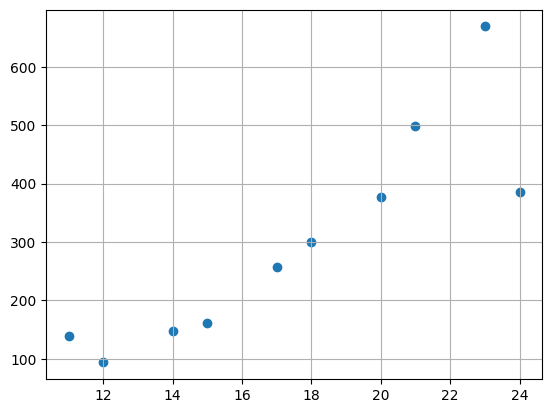

In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

with open('./lin_reg_training.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
    
x = data[:,0]
y = data[:,1]

plt.figure()
plt.scatter(x, y)
plt.grid()

print(data)
oldData = data


[[ 11.      139.66148]
 [ 12.       93.61153]
 [ 14.      147.53491]
 [ 15.      160.79333]
 [ 17.      257.75693]
 [ 18.      300.58685]
 [ 20.      377.37445]
 [ 21.      498.17725]
 [ 23.      669.0169 ]
 [ 24.      385.4427 ]]
[[-1.5215349  -0.94088185]
 [-1.2874526  -1.2061514 ]
 [-0.819288   -0.8955272 ]
 [-0.58520573 -0.81915236]
 [-0.11704115 -0.2605963 ]
 [ 0.11704115 -0.01387571]
 [ 0.58520573  0.42845708]
 [ 0.819288    1.1243383 ]
 [ 1.2874526   2.1084554 ]
 [ 1.5215349   0.47493395]]


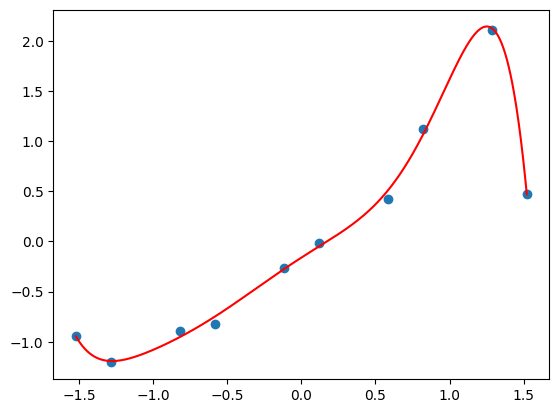

In [2]:
standard_scaler = StandardScaler()
data_scaler = standard_scaler.fit_transform(data)

print(data)
print(data_scaler)
plt.figure()
plt.scatter(np.array(data_scaler[:,0]), np.array(data_scaler[:,1]))

coefficients = np.polyfit(data_scaler[:,0], data_scaler[:,1], 7)

poly = np.poly1d(coefficients)
X_smooth = np.linspace(np.min(np.array(data_scaler[:,0])), np.max(np.array(data_scaler[:,0])), 1000)
Y_smooth = poly(X_smooth)
plt.plot(X_smooth, Y_smooth, color='red')

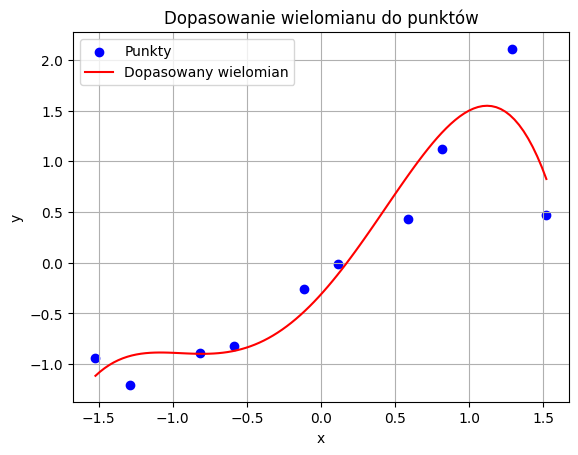

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dane wektorów punktów x i y
x = np.array(data_scaler[:,0])
y = np.array(data_scaler[:,1])

# Dopasowanie wielomianu stopnia 2
degree = 4
coefficients = np.polyfit(x, y, degree)

# Tworzenie wielomianu na podstawie współczynników
poly = np.poly1d(coefficients)

# Generowanie punktów na wykresie dla płynnej linii wielomianu
x_smooth = np.linspace(np.min(x), np.max(x), 100)
y_smooth = poly(x_smooth)

# Wykres punktowy
plt.scatter(x, y, color='blue', label='Punkty')

# Wykres dopasowanego wielomianu
plt.plot(x_smooth, y_smooth, color='red', label='Dopasowany wielomian')

# Dodatkowe opcje wykresu
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dopasowanie wielomianu do punktów')
plt.legend()

# Wyświetlenie wykresu
plt.grid(True)
plt.show()

[[-1.5215349 ]
 [-1.2874526 ]
 [-0.819288  ]
 [-0.58520573]
 [-0.11704115]
 [ 0.11704115]
 [ 0.58520573]
 [ 0.819288  ]
 [ 1.2874526 ]
 [ 1.5215349 ]]


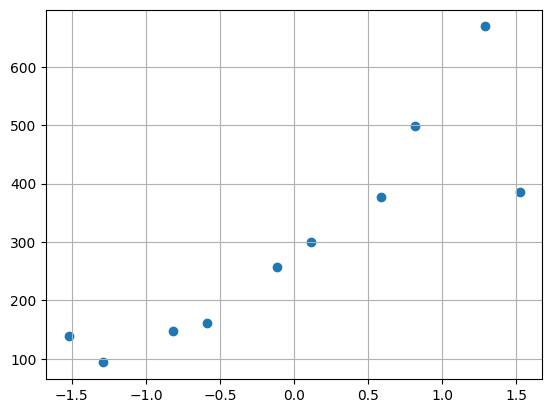

In [61]:
standard_scaler = StandardScaler()
a = data[:,0]
a.shape = (-1,1)
y = data[:,1]


y.shape = (-1,1)
y_T = y.T
x_training = standard_scaler.fit_transform(a)
print(x_training)
plt.figure()
plt.scatter(x_training, y)
plt.grid("on")

from sklearn.preprocessing import PolynomialFeaturex    
poly_features = PolynomialFeatures(degree=6)
x_train = poly_features.fit_transform(x_training)
x_trainT = x_train.T


def h_fun(X: np.ndarray, theta):
    return theta.T @ X

def calculate(X, y, theta):
    hFunResult = h_fun(X, theta)
    c = hFunResult - y
    gf = np.square(c)
    suma = np.sum(np.square(hFunResult - y))
    
    size = hFunResult.shape[1]
    return (1/(2*size)) * suma

def get_theta(X, y, eps, alpha): 
    theta = np.array([[0], [0], [0], [0], [0], [0], [0]])
    cost = 1
    while 1:
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        
        m = h_y_diff.shape[1]
        theta = theta - ((alpha * gradient.T) / m) 
        
        previousCost = cost
        cost = calculate(X, y, theta)
        
        if abs(previousCost - cost) < eps:
            break
    return cost,theta
cost, theta = get_theta(x_trainT, y_T, 1e-10, 1e-3)


[[ 275.06380096]
 [  93.25910344]
 [ -31.80314328]
 [ 281.06606688]
 [ 178.6835832 ]
 [-123.5325008 ]
 [ -72.31768811]]
cost:  57.30886280046036


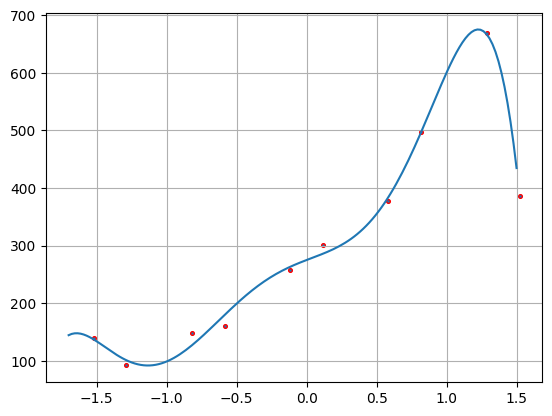

In [64]:
x_smooth = np.linspace(-1.7,1.5, 150)
x_smooth.shape = [-1,1]
poly_features = PolynomialFeatures(degree=6)
xToPloting = poly_features.fit_transform(x_smooth)
xToPloting = xToPloting.T
polyAnswer = h_fun(xToPloting, theta)

plt.figure()
plt.plot(xToPloting[1], polyAnswer[0])
print(theta)
plt.grid()
plt.scatter(x,y, edgecolors='r', s=7)
print("cost: ", cost)

[[-1.4142135  -0.70710677  0.          0.70710677  1.4142135 ]]
[ 94.19154 145.61594 199.77783 370.809   383.8684 ]
cost:  57.30886280046036


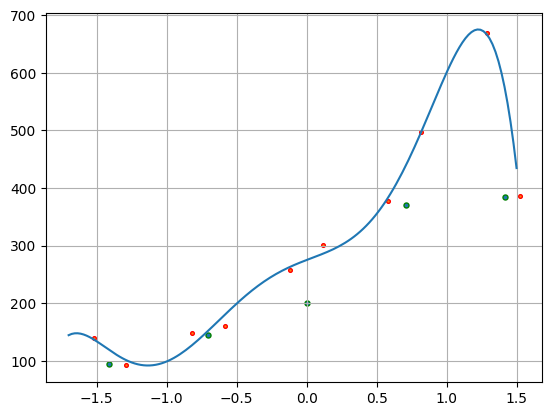

In [93]:
with open('./lin_reg_test.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
    
xTest = data[:,0]
yTest = data[:,1]


#print(yTest)
#print(x)
#print(y_T)
xTest.shape = [-1,1]
xTest = standard_scaler.fit_transform(xTest)
xTest = xTest.T

#print(xTest)

allx = np.concatenate((xTest[0], x))
ally = np.concatenate((yTest, y_T[0]))

allx.shape = [-1,1]
#print(allx)
#print(allx)

poly_features = PolynomialFeatures(degree=6)
allX = poly_features.fit_transform(allx)

#print(allX)
print(xTest)
print(yTest)

plt.figure()
plt.plot(xToPloting[1], polyAnswer[0])
plt.scatter(xTest[0], yTest, edgecolors='g', s=13)
plt.grid()
plt.scatter(x,y, edgecolors='r', s=7)
print("cost: ", cost)
